In [40]:
from brian2 import *

In [41]:
%matplotlib inline

In [5]:
20*volt

20. * volt

In [6]:
1000*amp

1. * kamp

In [7]:
1e6*volt            #e6 is megavolt

1. * Mvolt

In [8]:
1000*namp

1. * uamp

In [42]:
10*nA*(5*Mohm)       #combinations of units 

50. * mvolt

In [43]:
# A SIMPLE NEURON MODEL

tau=10*ms
eqs='''                   
dv/dt=(1-v)/tau:1
'''      
# ''' is used for a multi-lined string
# after : we should write the unit of the variable(in this case v) 
# and 1 means it has not unit

In [44]:
# CREATE A NEURON

G=NeuronGroup(1,eqs)

#NeuronGroup is a class to create neuron groups!!
#NeuronGroup(number of neurons, our diffrential equation)

In [45]:
#ACTUALLY RUN A SIMULATION
start_scope()  #make sure any Brian objects created before,aren’t included in the next run of the simulation.
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
run(100*ms)   #runs the simulation for 100 ms


INFO       No numerical integration method specified for group 'neurongroup_5', using method 'exact' (took 0.04s). [brian2.stateupdaters.base.method_choice]


In [46]:
start_scope()
tau=10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
print('Before v = %s' % G.v[0])   # by default variables start with the value zero
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0.0
After v = 0.9999546000702376


In [47]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))
#last cell was for simulation and this one is the real value

Expected value of v = 0.9999546000702375


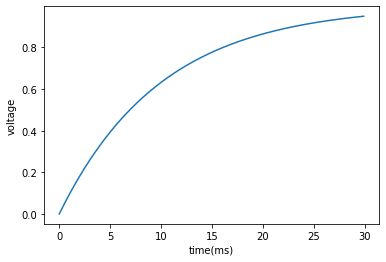

In [48]:
# VARIABLE V OVER TIME

start_scope()

G=NeuronGroup(1,eqs,method="exact")
M=StateMonitor(G,'v', record=True)     #to record the values of a neuron variable while the simulation runs
#we can set record=0 to record values for neuon0.We have to specify which neurons we want to record in large simulations
run(30*ms)
plot(M.t/ms,M.v[0]) 
xlabel("time(ms)")
ylabel("voltage");

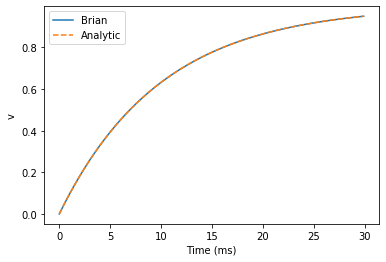

In [49]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--',label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend(); 
#legend is with guide:))


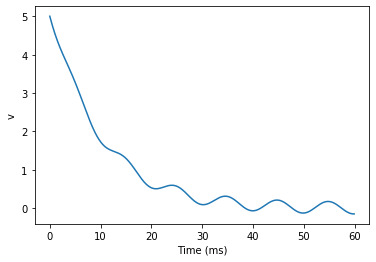

In [52]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='euler') #Change to Euler method, exact integrator doesn't work here
M = StateMonitor(G, 'v', record=0)
G.v = 5  # initial value
run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

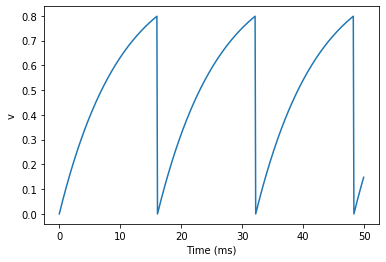

In [55]:
# ADDING SPIKING BEHAVIOUR
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')
# threshold:when to start firing_reset:after firing immediately reset
M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
#Brian has registered this event as a spike!!!

In [58]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)   # SHOWING SPIKES

run(50*ms)

print('Spike times: %s' % spikemon.t[:])


Spike times: [16.  32.1 48.2] ms


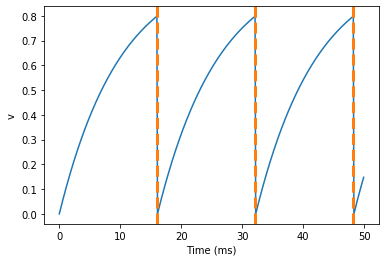

In [61]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3) #c is for color  # ls='--' type of line is dashed
xlabel('Time (ms)')
ylabel('v');